In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv


In [4]:
df = pd.read_csv('/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

#### So we have 155 Job title and 77 company location so far.

## EDA (Exploratory Data Analysis)

In [10]:
employment_counts = df['employment_type'].value_counts().sort_index()
df['employment_type_with_count'] = df['employment_type'].map(lambda x:f"{x}\n(N={employment_counts[x]})")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

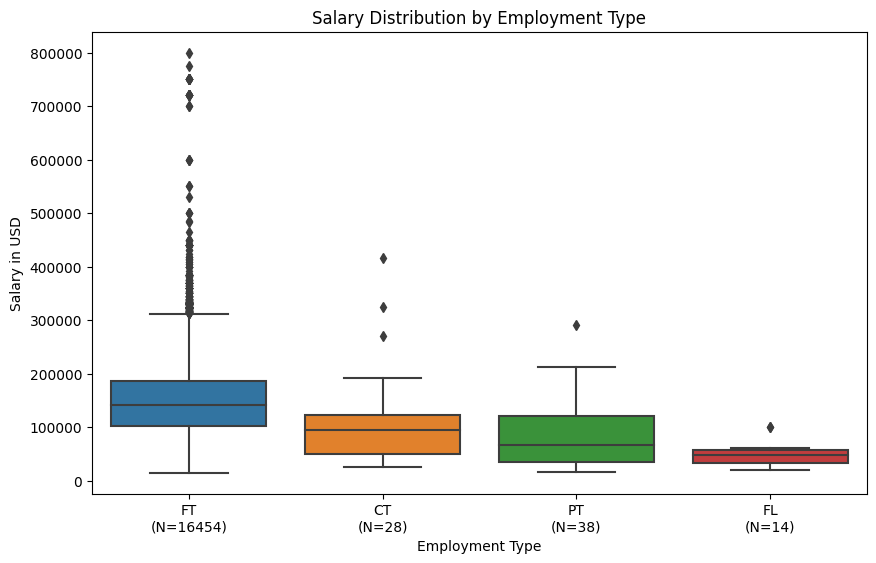

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='employment_type_with_count', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

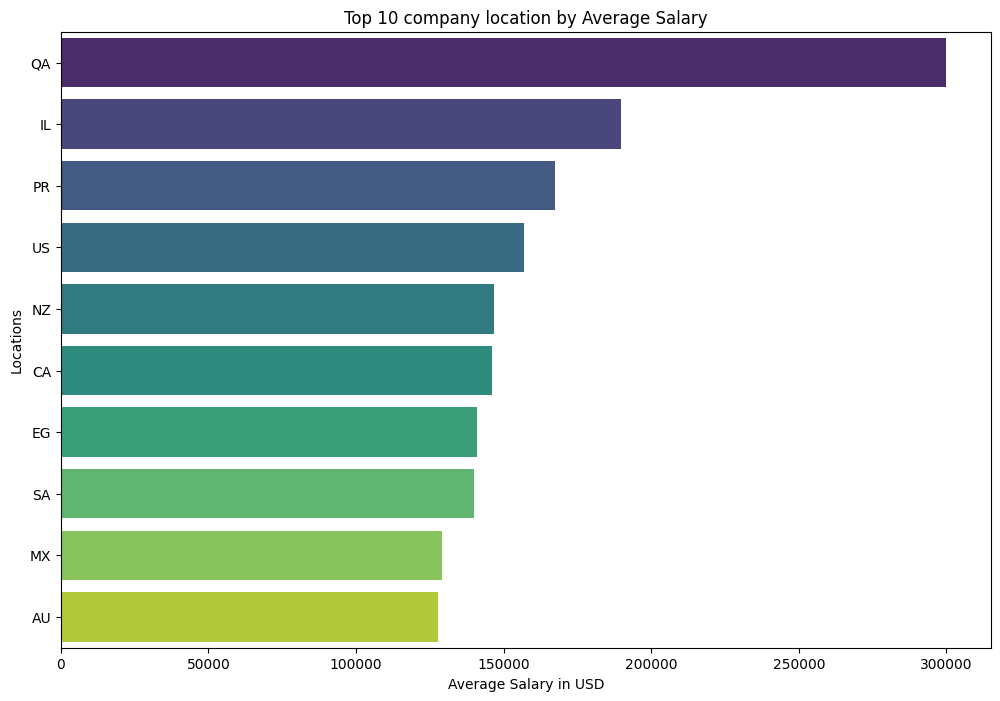

In [13]:
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_countries = average_salary_by_country.head(10)
top_10_countries = top_10_countries.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='salary_in_usd',y='company_location',data=top_10_countries,palette='viridis')
plt.title('Top 10 company location by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Locations')
plt.show()

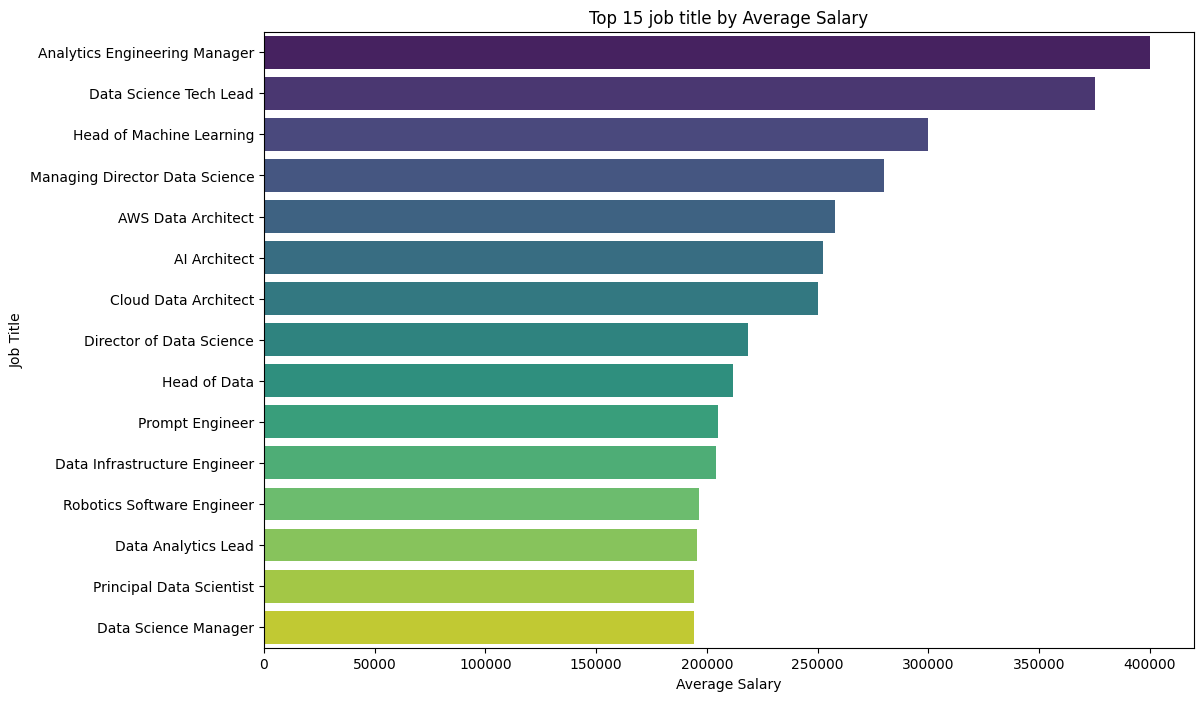

In [14]:
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_job_title = average_salary_by_job_title.head(15)
top_10_job_title = top_10_job_title.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='salary_in_usd',y='job_title',data=top_10_job_title, palette='viridis')
plt.title('Top 15 job title by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

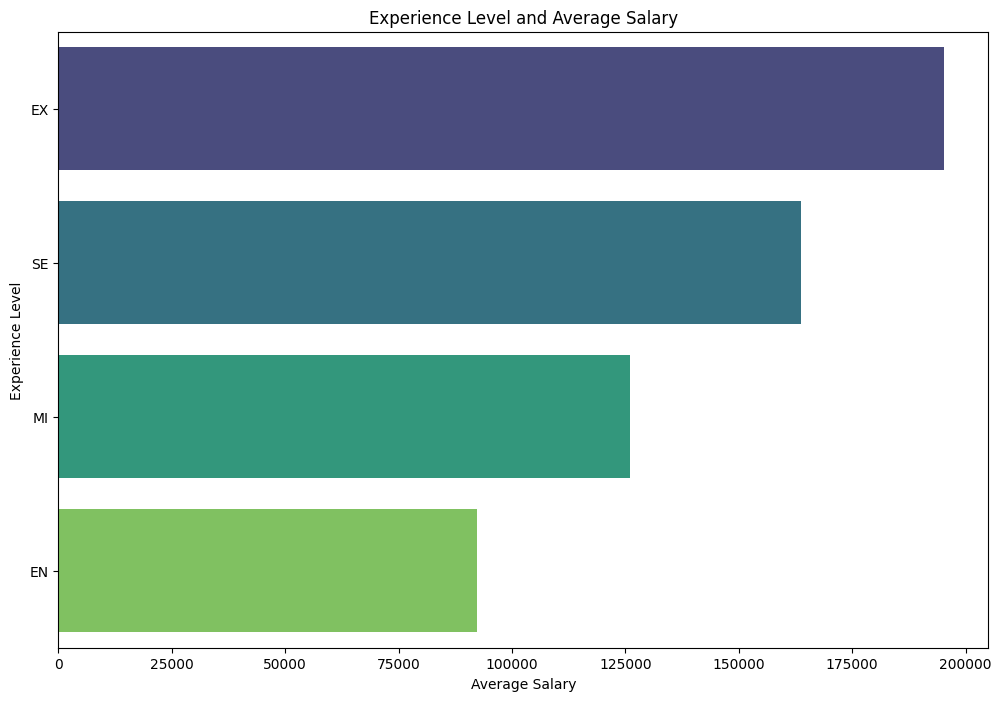

In [15]:
average_salary_by_experience_level = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
experience_level = average_salary_by_experience_level.head()
experience_level = experience_level.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='salary_in_usd',y='experience_level',data=experience_level,palette='viridis')
plt.title('Experience Level and Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Experience Level')
plt.show()

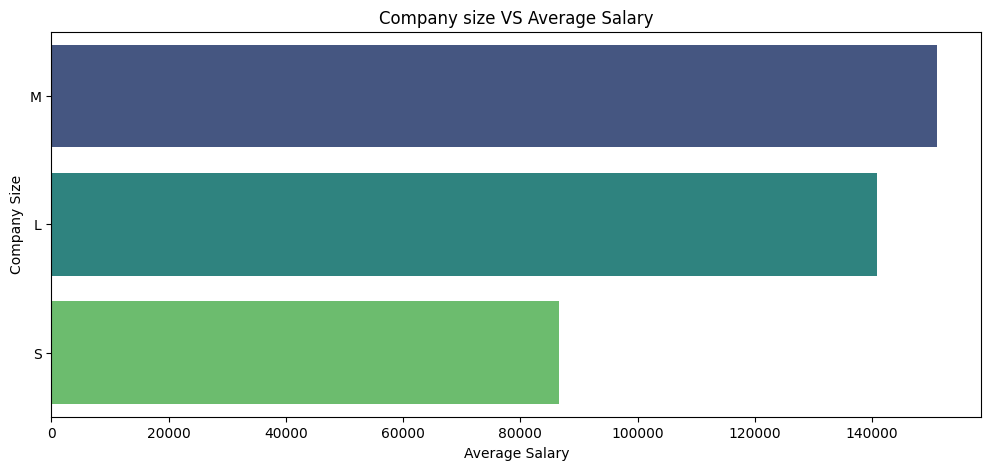

In [16]:
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
company_size = average_salary_by_company_size.head()
company_size = company_size.reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='salary_in_usd',y='company_size',data=company_size,palette='viridis')
plt.title('Company size VS Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Company Size')
plt.show()

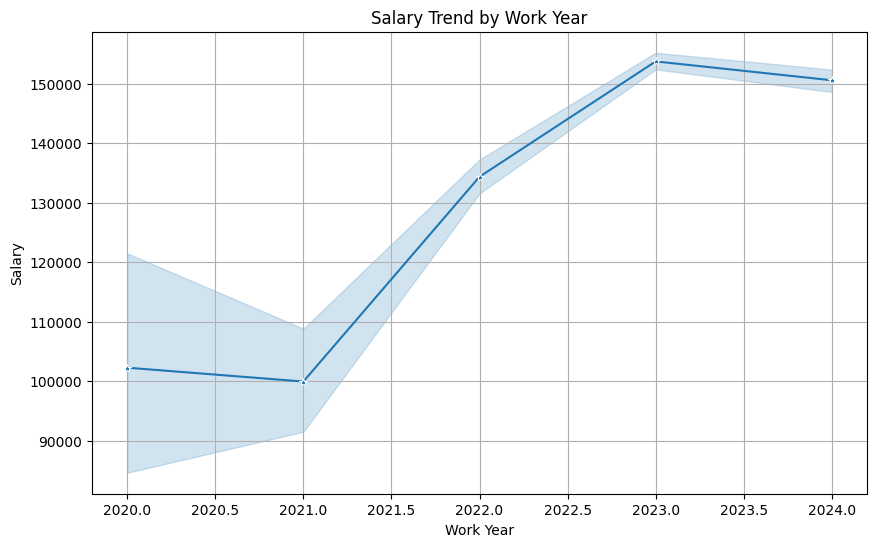

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x='work_year',y='salary_in_usd',data=df,marker='*')
plt.title('Salary Trend by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

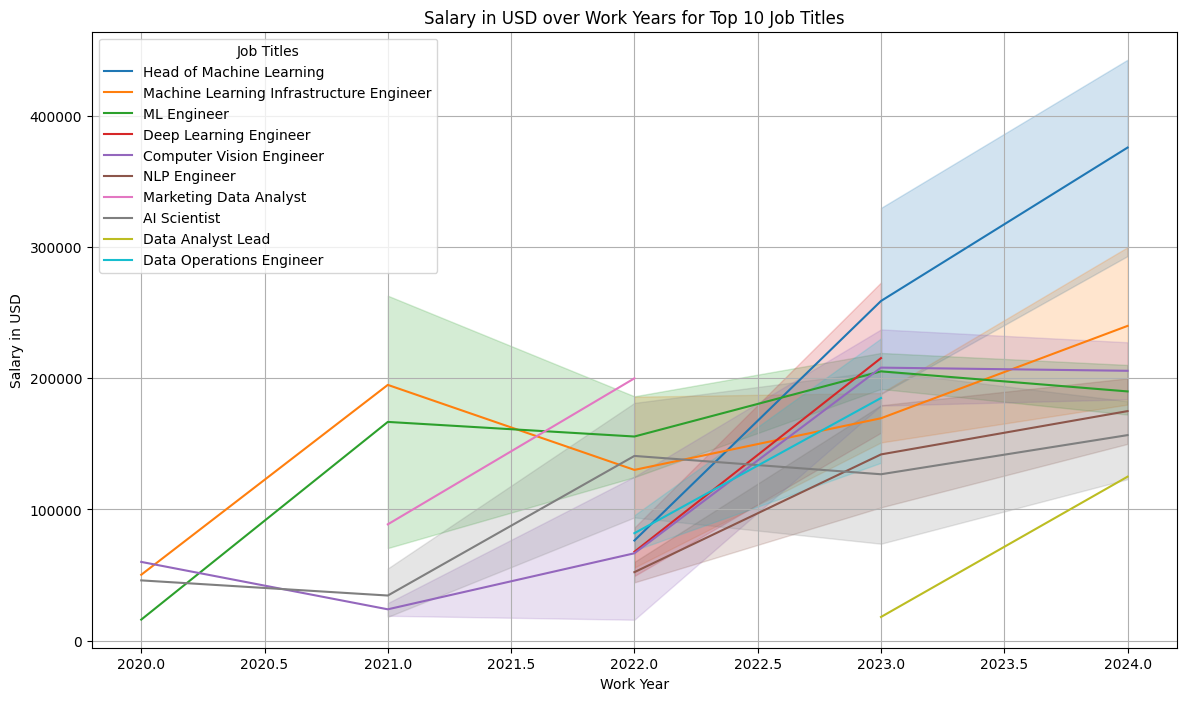

In [20]:
average_salary_by_job_year = df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().unstack()
average_salary_by_job_year['growth'] = average_salary_by_job_year.diff(axis=1).sum(axis=1)
top_10_job_titles = average_salary_by_job_year['growth'].sort_values(ascending=False).head(10).index

plt.figure(figsize=(14, 8))
plt.figure(figsize=(14, 8))
for job in top_10_job_titles:
    job_data = df[df['job_title'] == job]
    sns.lineplot(x='work_year', y='salary_in_usd', data=job_data, label=job)

plt.title('Salary in USD over Work Years for Top 10 Job Titles')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()